# **CS 470 Long HW 1**

## Question 1: Programming Question

In [1]:
# IMPORTS

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

Implementing the formula for how the friendliness (or relationship) between two nodes $i$ and $j$ in a social network changes over time: $\frac{d x_{ij}}{dt} = \sum_{k \in N} x_{ik} x_{kj}$




In [2]:
def simulate_friendliness(distribution_range, T_max):
    lower, upper = distribution_range
    X_initial = np.random.uniform(lower, upper, size=(N, N))
    X_initial = (X_initial + X_initial.T) / 2
    np.fill_diagonal(X_initial, 0)

    mean_friendliness = np.sum(X_initial) / (N * (N - 1))
    print(f"Initial mean friendliness: {mean_friendliness:.4f}")

    indices_upper = np.triu_indices(N, k=1)
    num_negative_edges = np.sum(X_initial[indices_upper] < 0)
    print(f"Inital number of negative edges: {num_negative_edges}")

    num_positive_edges = np.sum(X_initial[indices_upper] > 0)
    print(f"Initial number of positive edges: {num_positive_edges}")


    indices = indices_upper
    X0 = X_initial[indices]

    def dxdt(t, X_flat):
        X = np.zeros((N, N))
        X[indices] = X_flat
        X = X + X.T
        np.fill_diagonal(X, 0)

        dXdt_full = X @ X
        dXdt_full = (dXdt_full + dXdt_full.T) / 2
        np.fill_diagonal(dXdt_full, 0)

        dXdt_flat = dXdt_full[indices]
        return dXdt_flat

    t_eval = np.linspace(0, T_max, num=1000)

    sol = solve_ivp(dxdt, t_span=(0, T_max), y0=X0, t_eval=t_eval, method='RK45')

    X_final = np.zeros((N, N))
    X_final[indices] = sol.y[:, -1]
    X_final = X_final + X_final.T
    np.fill_diagonal(X_final, 0)

    # Count final positive and negative edges
    num_negative_edges_final = np.sum(X_final[indices_upper] < 0)
    num_positive_edges_final = np.sum(X_final[indices_upper] > 0)
    print(f"Final number of negative edges: {num_negative_edges_final}")
    print(f"Final number of positive edges: {num_positive_edges_final}")
    return sol.t, sol.y




### **Task 1:** A complete graph with friendliness values drawn from a uniform distribution with a mean $\mu > 0$

Initial mean friendliness: 0.2511
Inital number of negative edges: 622
Initial number of positive edges: 4328
Final number of negative edges: 0
Final number of positive edges: 4950


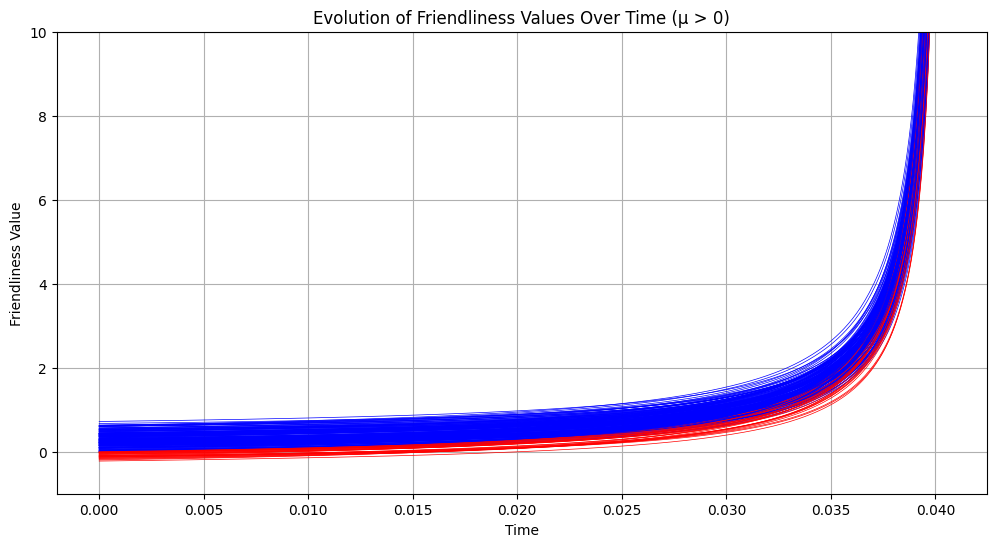

In [3]:
N = 100
T_max = 0.1

distribution_range = (-0.25, 0.75)

t, X_over_time = simulate_friendliness(distribution_range, T_max)

num_edges_to_plot = 200
indices_to_plot = np.random.choice(X_over_time.shape[0], size=num_edges_to_plot, replace=False)

plt.figure(figsize=(12, 6))
for idx in indices_to_plot:
    initial_friendliness = X_over_time[idx, 0]

    if initial_friendliness > 0:
        color = 'blue'
    else:
        color = 'red'
    plt.plot(t, X_over_time[idx, :], color= color, linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Friendliness Value')
plt.title('Evolution of Friendliness Values Over Time (μ > 0)')
plt.ylim([-1, 10])
plt.grid(True)
plt.show()


**Report:**

Task 1 examines the evolution of friendliness values in a social network where the initial mean friendliness (μ) > 0, with initial values ranging between -0.25 and 0.75. The plot demonstrated that positive (blue) relationships grew rapidly over time. The negative (red) relationships did not change as drastically in the same direction, instead they remained close to neutral or also joined the exponentioal curve and became positive. So it's seen that over time, the positive edges reinforced each other and the initially negative edges, resulting in exponential positive growth towards the end of the simulation where all edges ended up being positive.

**Task 4 Analysis:**

This pattern is consistent with the theory that positive relationships reinforce each other, causing them to strengthen over time, while negative ones have less impact in this positively biased environment. At the end of the simulation, most edges were positive, with very few remaining negative, indicating that initial positivity leads to the dominance of positive friendliness. This reflects real-world social dynamics, where positive environments tend to produce stronger and more cohesive relationships, while negativity weakens or dissipates.

### **Task 2:** A complete graph with friendliness values drawn from a uniform distribution with a mean $\mu = 0$

Initial mean friendliness: 0.0011
Inital number of negative edges: 2429
Initial number of positive edges: 2521
Final number of negative edges: 2468
Final number of positive edges: 2482


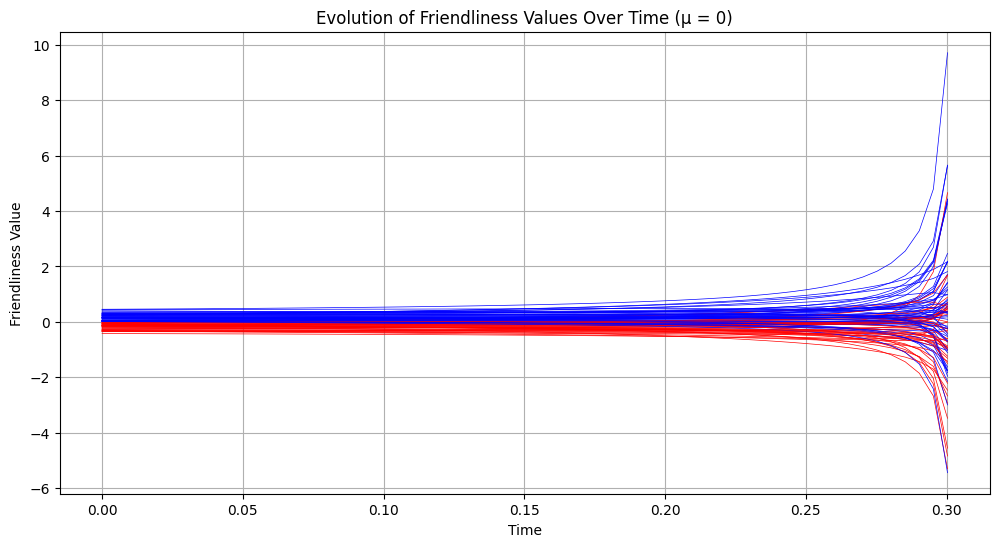

In [4]:
N = 100
T_max = 5

distribution_range = (-0.5, 0.5)
t, X_over_time = simulate_friendliness(distribution_range, T_max)

plt.figure(figsize=(12, 6))
num_edges_to_plot = 500
indices_to_plot = np.random.choice(X_over_time.shape[0], size=N, replace=False)

for idx in indices_to_plot:
    initial_friendliness = X_over_time[idx, 0]
    if initial_friendliness > 0:
        color = 'blue'
    else:
        color = 'red'
    plt.plot(t, X_over_time[idx, :], color= color, linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Friendliness Value')
plt.title('Evolution of Friendliness Values Over Time (μ = 0)')
plt.grid(True)
plt.show()


**Report:**

Task 2 simulated the evolution of friendliness in a network with an initial neutral mean friendliness value (μ = 0) using a distribution range of -0.5 to 0.5. The resulting plot displayed a clear division: positive edges (blue lines) grew steadily, while negative edges (red lines) deepened slightly. Initially, the neutral relationships did not experience drastic changes, with some positive edges gaining strength and negative edges becoming more negative there were also some positive edges becoming negative and some negative edges becoming positive. The overall rate of growth for both types of relationships was moderate, especially compared to the more positively biased simulation in Task 1.

**Task 4 Analysis:**

As time progressed, the network displayed a clear divergence, with positive relationships strengthening, though not at an accelerated rate, while negative relationships grew increasingly negative. This reflects a balanced scenario where relationships either improve or deteriorate based on initial conditions, but the rate of change is not as pronounced due to the initial neutrality. In real-life contexts, this suggests that in environments without strong initial biases, relationships can evolve in either direction, with both positive and negative outcomes possible depending on interactions.

### **Task 3:** A complete graph with friendliness values drawn from a uniform distribution with a mean $\mu < 0$

Initial mean friendliness: -0.2501
Inital number of negative edges: 4342
Initial number of positive edges: 608
Final number of negative edges: 2518
Final number of positive edges: 2432


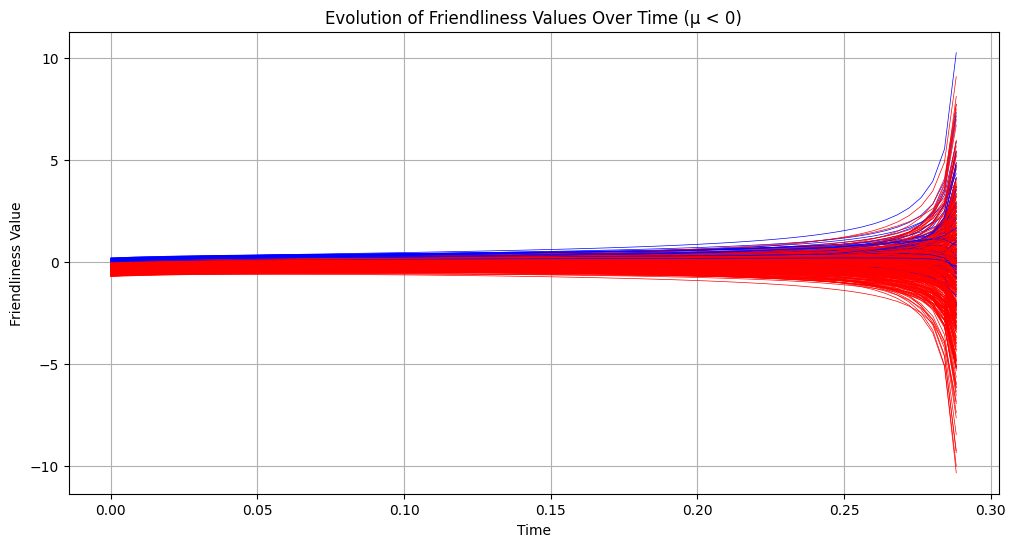

In [5]:
N = 100
T_max = 4

distribution_range = (-0.75, 0.25)
t, X_over_time = simulate_friendliness(distribution_range, T_max)

plt.figure(figsize=(12, 6))

num_edges_to_plot = 500
indices_to_plot = np.random.choice(X_over_time.shape[0], size=num_edges_to_plot, replace=False)


for idx in indices_to_plot:
    initial_friendliness = X_over_time[idx, 0]
    if initial_friendliness > 0:
        color = 'blue'
    else:
        color = 'red'
    plt.plot(t, X_over_time[idx, :], color= color, linewidth=0.5)
plt.xlabel('Time')
plt.ylabel('Friendliness Value')
plt.title('Evolution of Friendliness Values Over Time (μ < 0)')
plt.grid(True)
plt.show()


**Report:**

Task 3 involved a simulation where the initial mean friendliness was negative (μ < 0), with initial values ranging from -0.75 to 0.25. In this scenario, the network was predominantly biased towards negativity. The plot showed that the negative relationships (red lines) deepened over time, reinforcing themselves and growing more negative. Positive relationships (blue lines), though present, struggled to grow and did so at a much slower pace compared to the negative ones.

**Task 4 Analysis:**

As the simulation progressed, the positive edges showed some growth, but their influence remained limited in this predominantly negative environment. The negative relationships continued to deteriorate, with a widening gap between positive and negative edges by the end of the simulation. This demonstrates how negativity, when dominant from the outset, tends to reinforce itself, leading to a more hostile or unfriendly social network. Positive relationships, although they can exist, find it difficult to thrive in such an environment, much like how in real-world social settings, conflict and hostility can escalate without intervention, making it difficult for positive bonds to form and grow.

# Question 3: Extra Credit

In [10]:
from google.colab import files
uploaded = files.upload()

Saving preference.csv to preference (2).csv


In [7]:
import pandas as pd
import io
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

done and sum: 1963


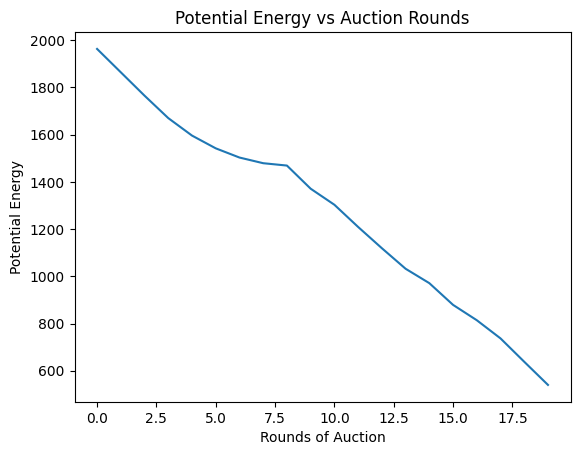

In [11]:
preferences = pd.read_csv(io.BytesIO(uploaded['preference (2).csv']))
buyers = preferences['buyer0'].tolist()
valuations = preferences.drop(columns=['buyer0']).values

num_houses = valuations.shape[1]
prices = np.zeros(num_houses)

def construct_preferred_seller_graph(valuations, prices):
    G = nx.Graph()
    num_buyers = valuations.shape[0]

    for buyer_idx in range(num_buyers):
        for house_idx in range(num_houses):
            if valuations[buyer_idx, house_idx] >= prices[house_idx]:
                G.add_edge(f'buyer{buyer_idx}', f'house{house_idx}')

    # print(G.nodes())
    return G

def find_constricted_set_and_update_prices(G, prices):
    matching = nx.max_weight_matching(G, maxcardinality=True)
    matched_buyers = {x for x, _ in matching}
    all_buyers = {f'buyer{idx}' for idx in range(valuations.shape[0])}
    S = all_buyers - matched_buyers

    N_S = set()
    for buyer in S:
        N_S.update(G.neighbors(buyer))

    for house in N_S:
        house_idx = int(house.replace('house', ''))
        prices[house_idx] += 1

    return prices

def calculate_potential_energy(valuations, prices):
    energy = 0
    for buyer_idx in range(valuations.shape[0]):
        house_idx = np.argmax(valuations[buyer_idx] - prices)
        energy += valuations[buyer_idx, house_idx] - prices[house_idx]
    return energy

potential_energies = []
initial_energy = calculate_potential_energy(valuations, prices)
potential_energies.append(initial_energy)
rounds = 0

while True:
    G = construct_preferred_seller_graph(valuations, prices)

    if nx.is_perfect_matching(G, nx.max_weight_matching(G)):
        break

    prices = find_constricted_set_and_update_prices(G, prices)

    energy = calculate_potential_energy(valuations, prices)
    potential_energies.append(energy)

    rounds += 1

# print(potential_energies[0])

plt.plot(range(len(potential_energies)), potential_energies)
plt.xlabel('Rounds of Auction')
plt.ylabel('Potential Energy')
plt.title('Potential Energy vs Auction Rounds')
plt.savefig('potential-energy.png')


matching = nx.max_weight_matching(G)
output_data = []
for buyer, house in matching:
    if 'buyer' in buyer:
        buyer_idx = int(buyer.replace('buyer', ''))
        house_idx = int(house.replace('house', ''))
    else:
        buyer_idx = int(house.replace('buyer', ''))
        house_idx = int(buyer.replace('house', ''))

    payoff = valuations[buyer_idx, house_idx] - prices[house_idx]
    output_data.append([buyer, house, payoff])

market_clearing_df = pd.DataFrame(output_data, columns=['Buyer', 'House', 'Payoff'])
market_clearing_df.to_csv('/content/drmarket-clearing.csv', index=False)

# check sum of all max values
sum_of_max_values = np.sum(np.max(valuations, axis=1))

print(f"done and sum: {sum_of_max_values}")
